In [139]:
def Wolfe_learning_rate(f, gradf, x, d, s0=5, eps1 = 1e-4, eps2 = 0.99, itermax = 20):
#     d : search direction
#     s0 : first approximation of learning rate
#     0 < esp1 < eps2 < 1
#     k := 0 ; s− = 0 ; s+ = +∞;

    iter, sn , sp = 0,0, 1e8
#     sn, sp are the minorant and majorant of learning rate s
    grad_x = gradf(x)
    f_x = f(x)
    s = s0 
    cond1 = f(x+s*d) <= f_x + eps1*s*grad_x.T.dot(d)
    cond2 = gradf(x+s*d).T.dot(d) >= eps2*grad_x.T.dot(d)
    while not cond1 or not cond2 :
        if not cond1: 
            sp = s
            s = (sn + sp)/2.
        elif not cond2:
            sn = s
            if sp < 1e8:
                s = (sn + sp)/2.
            else:
                s = 2*s 
        cond1 = f(x+s*d) <= f_x + eps1*s*grad_x.T.dot(d)
        cond2 = gradf(x+s*d).T.dot(d) >= eps2*grad_x.T.dot(d)
        iter += 1 
        if iter > itermax:
            break
    return s , iter

In [140]:
from scipy.optimize import line_search
import numpy as np
def obj_func(x):
    return (x[0])**2+(x[1])**2
def obj_grad(x):
    return np.array([2*x[0], 2*x[1]])
start_point = np.array([1.8, 1.7])
search_gradient = np.array([-1.0, -1.0])
print("Scipy line_search : ", line_search(obj_func, obj_grad, start_point,search_gradient )[0])
print("Homemade line_search: ",Wolfe_learning_rate(obj_func,obj_grad,start_point, -obj_grad(start_point))[0])

Scipy line_search :  1.0
Homemade line_search:  0.625


In [141]:
def objective(x):
    return x[0]**2 + 4*x[1]**2
def grad(x):
    return 2*x*np.array([1, 4])
x = np.array([1., 3.]) #current point
p = -grad(x) #current search direction
a = line_search(objective, grad, x, p)[0]
print("Scipy line_search : ",a)
print("Homemade line_search: ",Wolfe_learning_rate(objective,grad,x, p)[0])

Scipy line_search :  0.12564991334488734
Homemade line_search:  0.15625


In [ ]:
import numpy.linalg as npl 
def BFGS(f,gradf,x0, B0):
#     H0 is random symetric definite positive matrix
    B = B0
    iter = 0
    d = -B.dot(gradf(x))
    s = Wolfe_learning_rate(f, gradf, x, d)
    x = x - s*B.dot(gradf(x))
    

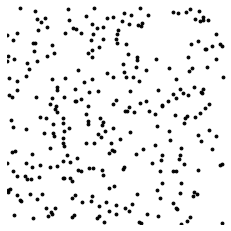

True
True
Wolfe_learning_rate calculation time:  9.841082000000029
GradDescent_wolfe one loop running time:  12.356281999999965
True
True
Wolfe_learning_rate calculation time:  9.669677000000036
GradDescent_wolfe one loop running time:  12.124246999999968
True
True
Wolfe_learning_rate calculation time:  8.595211000000006
GradDescent_wolfe one loop running time:  10.973973
True
True
Wolfe_learning_rate calculation time:  6.884126999999978
GradDescent_wolfe one loop running time:  8.545978999999988
True
True
Wolfe_learning_rate calculation time:  7.172543000000019
GradDescent_wolfe one loop running time:  8.877945000000011
True
True
Wolfe_learning_rate calculation time:  7.386224999999968
GradDescent_wolfe one loop running time:  9.235371999999984
True
True
Wolfe_learning_rate calculation time:  7.032768000000033
GradDescent_wolfe one loop running time:  8.735584000000017
True
True
Wolfe_learning_rate calculation time:  6.958166000000006
GradDescent_wolfe one loop running time:  8.656330

True
True
Wolfe_learning_rate calculation time:  6.886539999999968
GradDescent_wolfe one loop running time:  8.553769000000102
True
True
Wolfe_learning_rate calculation time:  6.952684999999974
GradDescent_wolfe one loop running time:  8.629100999999991
True
True
Wolfe_learning_rate calculation time:  6.999338999999964
GradDescent_wolfe one loop running time:  9.093913999999813
True
True
Wolfe_learning_rate calculation time:  7.038583999999901
GradDescent_wolfe one loop running time:  8.74965199999997
True
True
Wolfe_learning_rate calculation time:  7.856919000000062
GradDescent_wolfe one loop running time:  9.56668999999988
True
True
Wolfe_learning_rate calculation time:  6.899568000000045
GradDescent_wolfe one loop running time:  8.749545000000126
True
True
Wolfe_learning_rate calculation time:  6.873741999999993
GradDescent_wolfe one loop running time:  8.56935499999986
True
True
Wolfe_learning_rate calculation time:  6.89420999999993
GradDescent_wolfe one loop running time:  8.5873

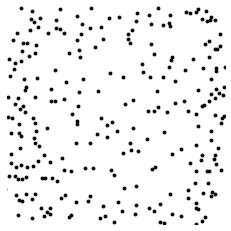

GradDescent_wolfe one loop running time:  8.638445000000047


<Figure size 432x288 with 0 Axes>

In [31]:
%run -i 'myscript.py'
%run -i 'poisson_disc.py'
N = 401
pi = importIMG('../images/circle.png', N, show = False)

xgrid = (np.arange(N)+0.5)/N - 0.5
ygrid = (np.arange(N)+0.5)/N - 0.5

num_pts = 300
px = np.random.uniform(-0.5,0.5,num_pts)
py = np.random.uniform(-0.5,0.5,num_pts)
p = np.zeros([num_pts,2])
p[:,0] = px
p[:,1] = py

pmin = GradDescent_wolfe(J,gradJ,p,pi,xgrid,ygrid,100,30)

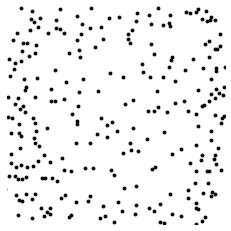

<Figure size 432x288 with 0 Axes>

In [33]:
myplot(pmin,100)